## Ridge Regression
Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.

In order to carry out ridge regression on the natural gas data set, we commence by importing the required libraries

Firstly, let us import the libraries.

In [50]:
from sklearn.linear_model import Ridge
import numpy as np

The next step is to load the data as pandas data frame. 

In [2]:
import pandas as pd
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


Now, select the needed variables (columns), define it as a new pandas dataframe and then use it tp create a numpy array suitable for regression

In [3]:
# create new dataframe of independent variables
dfvar = df[['AveCoalPrice', 'OilPrice', 'GrossGasProd', 'TotGasCons']]

In [4]:
# create numpy arrays of the dependent and independent variables with n_samples, n_features = 104, 4
X = dfvar.values
Y = df.GasPrice.values

We will now generate our estimator instance clf (classifier) and use it to fit a ridge model on the full data.

In [5]:
clf = Ridge(alpha=1.0)
clf.fit(X, Y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Let us now calculate the parameters of our ridge regression

In [7]:
coef_ridge = clf.coef_
coef_ = clf.coef_ * X + clf.intercept_

In [9]:
coef_ridge

array([ 0.05515652,  0.00292577, -0.00167807,  0.00039166])

We will now split the data in train set and test set

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)

In [14]:
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

y_pred_ridge = clf.fit(X_train, y_train).predict(X_test)


### Plotting Ridge coefficients as a function of the L2 regularization
Each color in the left plot represents one different dimension of the coefficient vector, and this is displayed as a function of the regularization parameter. The right plot shows how exact the solution is. This shows how a well defined solution is found by Ridge regression and how regularization affects the coefficients and their values. The plot on the right shows how the difference of the coefficients from the estimator changes as a function of regularization.

The dependent variable Y is set as a function of the input features: y = X*w + c. 

The coefficient vector w is randomly sampled from a normal distribution, whereas the bias term c is set to a constant. As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w. For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution. These dependencies can be observed on the left plot. The right plot shows the mean squared error between the coefficients found by the model and the chosen vector w. Less regularised models retrieve the exact coefficients (error is equal to 0), stronger regularised models increase the error.


In [38]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

Automatically created module for IPython interactive environment


In [39]:
clf = Ridge()

In [41]:
X, Y, w = make_regression(n_samples=104, n_features=4, coef=True,
                          random_state=1, bias=3.5)

In [42]:
coefs = []
errors = []

alphas = np.logspace(-6, 6, 104)

Train the model with different regularisation strengths

In [43]:
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, w))

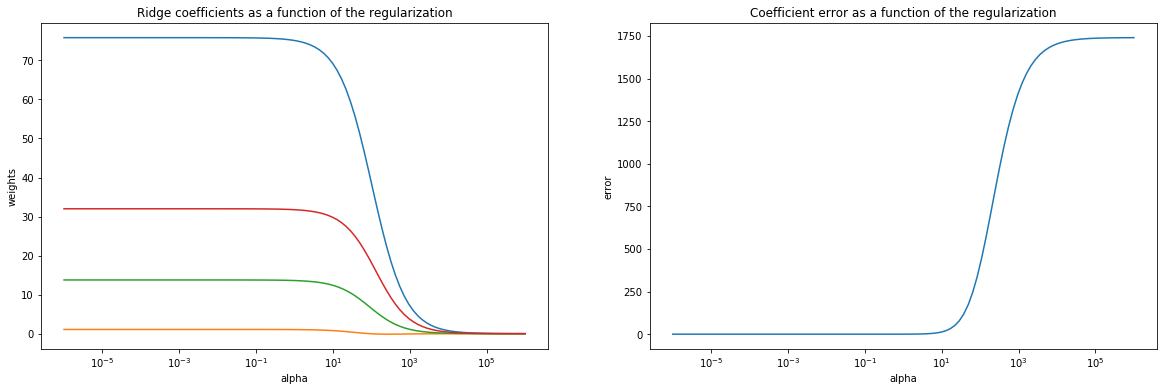

In [44]:
# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

### Plotting Ridge coefficients as a function of the regularization
Now we will generate a plot that shows the effect of collinearity in the coefficients of our estimator. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter. Here we show the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. 

Let us first compute the paths

In [48]:
n_alphas = 104
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, Y)
    coefs.append(clf.coef_)

We will then display results

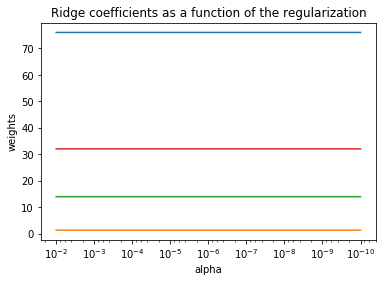

In [49]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()